**NTUST course: Computer Vision and Applications (CI5336701, 2022 Spring)**

**Homework #2 :Swap the contents of two photo frames in an image by homography**

# 讀取來源圖檔集

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


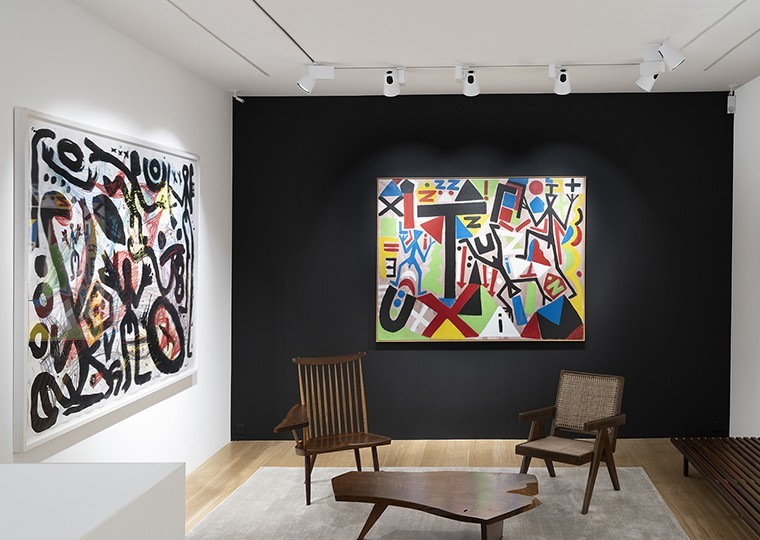

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive')
Hw2_Image_Ori_Path = '/content/drive/MyDrive/Course/11002/Computer Vision/HW2/ArtGallery.jpg'
Hw2_Image_Result_Path = "/content/drive/MyDrive/Course/11002/Computer Vision/HW2/M11015Q03.jpg"
Ori_Imgae = cv2.imread(Hw2_Image_Ori_Path)
cv2_imshow(Ori_Imgae)

# 確認左右轉換圖片座標位置

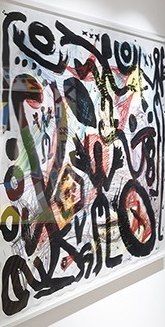

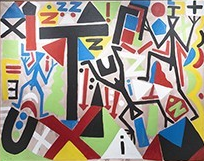

In [2]:
left_image = Ori_Imgae[117:444,29:194]
cv2_imshow(left_image)

Left_Position = np.asarray([
[ 30, 117]
,[ 30, 444]
,[ 194,367]
,[ 194,160]
])

right_image = Ori_Imgae[178:339,378:582]
cv2_imshow(right_image)

Right_Position = np.asarray([
[378,178]
,[378,341]
,[582,341]
,[582,178]
])

# 裁減圖片工作, 透過透過OpenCV FillPoly 轉換

In [3]:
def Crop_Image_Point(Src_Imgae_Ori, Point):
    # 透過點位座標裁減出預計"轉換影像", 以及遮罩
    Mask = np.zeros(Src_Imgae_Ori.shape, dtype=np.uint8)
    cv2.fillPoly(Mask, [Point.astype(np.int32)], (255,)*Src_Imgae_Ori.shape[2])
    return cv2.bitwise_and(Src_Imgae_Ori, Mask), Mask

# 計算 Homography 公式, 採用OpenCV findHomography 

In [4]:
def CalCv2Homography(x, xp):
    #透過 OpenCV 計算 Homography 矩陣數值
    #x' = H * X
    HomoMatrix, _ = cv2.findHomography(Left_Position, Right_Position)
    return HomoMatrix

# 透過 Homography Matrix 進行轉換

In [5]:
def Convert_Image(Original_Image, Left_Image, Right_Image, HomoMatrix):
    Original_Image_Shape = (Original_Image.shape[1],Original_Image.shape[0])
    Convert_Left_Image = cv2.warpPerspective(Left_Image, HomoMatrix, Original_Image_Shape)
    Convert_Right_Image = cv2.warpPerspective(Right_Image, np.linalg.inv(HomoMatrix), Original_Image_Shape)
    return Convert_Left_Image, Convert_Right_Image

# 裁減原圖方便後續進行填補作業

In [6]:
def CropImage(Image_Original, Left_Mask, Right_Mask ):
    return cv2.bitwise_and(Image_Original, cv2.bitwise_not(cv2.bitwise_or(Left_Mask, Right_Mask)))

# 將轉換圖檔進行填補

In [7]:
def Fill2Image(Image_Original, HomoMatrix, Left_Image, Right_Image, Left_Mask, Right_Mask ):
    background = cv2.bitwise_and(Image_Original, cv2.bitwise_not(cv2.bitwise_or(Left_Mask, Right_Mask)))

    Convert_Src_Left, Convert_Src_Right = Convert_Image(Image_Original, Left_Image, Right_Image, HomoMatrix)
    Swap_Image = cv2.bitwise_or(Convert_Src_Left, Convert_Src_Right)
    Fill_Image = cv2.bitwise_or(background, Swap_Image)
    cv2_imshow(Fill_Image)
    cv2.imwrite(Hw2_Image_Result_Path, Fill_Image)
    #return cv2.bitwise_or(background, Swap_Image)

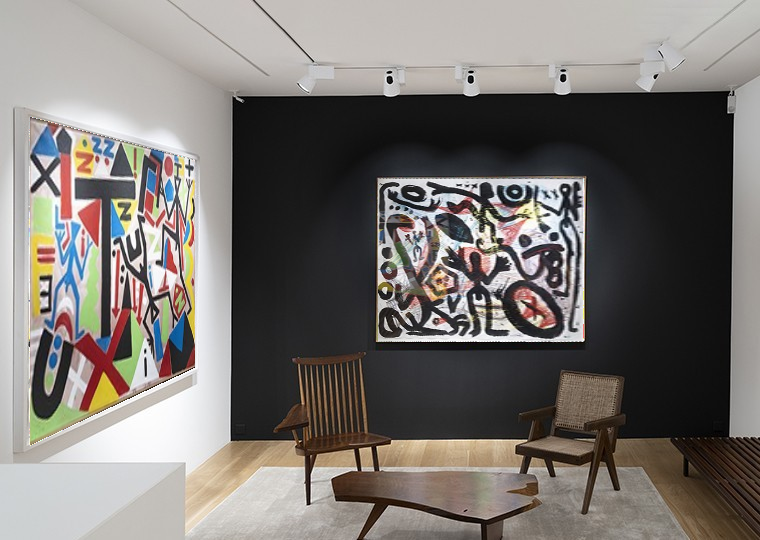

In [8]:


if __name__ == "__main__":
  #讀取原始影像 ArtGallery.jpg
  Image_Original = cv2.imread(Hw2_Image_Ori_Path)

  # 使用 findHomography 得到 homography matrix
  HomoMatrix, _ = cv2.findHomography(Left_Position, Right_Position)

  # 裁減原始圖片
  Left_Image , L_mask = Crop_Image_Point(Image_Original, Left_Position)
  Right_Image, R_mask = Crop_Image_Point(Image_Original, Right_Position)

  # 利用 homography matrix 對調裁切後的藝術品位置
  Fill2Image(Image_Original, HomoMatrix, Left_Image, Right_Image, L_mask, R_mask)